In [1]:
# Exercises for classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
n, d = 1000, 2

y_tr = 2 * np.random.binomial(1, 0.5, n) - 1
x_tr = np.zeros((n, d))
x1_tr = np.random.randn((y_tr == -1).sum(), d) + np.array([100, 0])
x2_tr = np.random.randn((y_tr == 1).sum(), d) + np.array([103, 0])
x_tr[y_tr == -1, :2] = x1_tr
x_tr[y_tr == 1, :2] = x2_tr

In [3]:
y_te = 2 * np.random.binomial(1, 0.5, n) - 1
x_te = np.zeros((n, d))
x1_te = np.random.randn((y_te == -1).sum(), d) + np.array([100, 0])
x2_te = np.random.randn((y_te == 1).sum(), d) + np.array([103, 0])
x_te[y_te == -1, :2] = x1_te
x_te[y_te == 1, :2] = x2_te

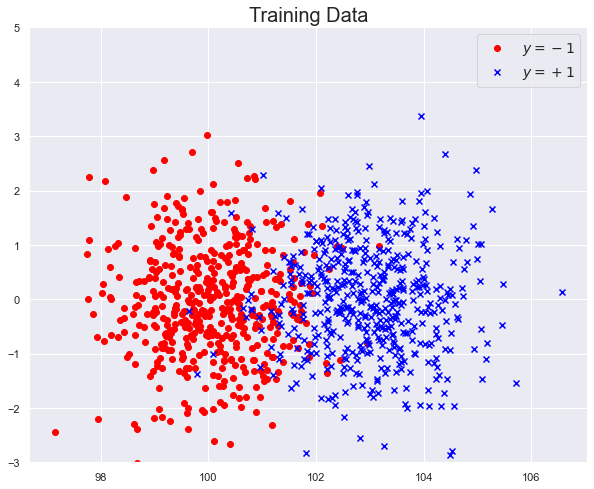

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(x_tr[y_tr == -1, 0], x_tr[y_tr == -1, 1], marker='o', c='red', label='$y = -1$')
plt.scatter(x_tr[y_tr == 1, 0], x_tr[y_tr == 1, 1], marker='x', c='blue', label='$y = +1$')
plt.ylim((-3, 5))
plt.title('Training Data', fontsize=20)
plt.legend(fontsize=14)

In [17]:
# Adding a dummy dimension for dealing with the shifts.
ones_tr = np.ones((x_tr.shape[0], 1))
ones_te = np.ones((x_te.shape[0], 1))

x_tr_d = np.concatenate([x_tr, ones_tr], axis=1)
x_te_d = np.concatenate([x_te, ones_te], axis=1)

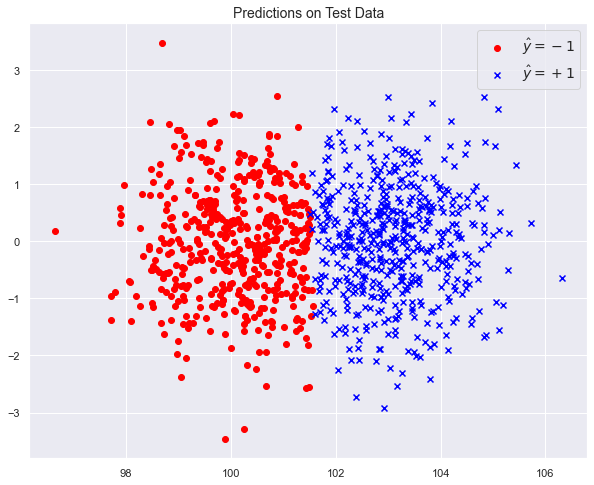

In [19]:
# Estimate a:
a_hat = np.linalg.solve(x_tr_d.T @ x_tr_d,
                        x_tr_d.T @ y_tr)

# Predict y_te:
y_te_hat = np.sign(x_te_d @ a_hat)

# Plot the result
# (Note that we use x_te instead of x_te_d
#  in order to see the result in the original space):
plt.figure(figsize=(10, 8))
plt.scatter(x_te[y_te_hat == -1, 0], x_te[y_te_hat == -1, 1], marker='o', c='red', label='$\hat{y} = -1$')
plt.scatter(x_te[y_te_hat == 1, 0], x_te[y_te_hat == 1, 1], marker='x', c='blue', label='$\hat{y} = +1$')
plt.title('Predictions on Test Data', fontsize=14)
plt.legend(fontsize=14)

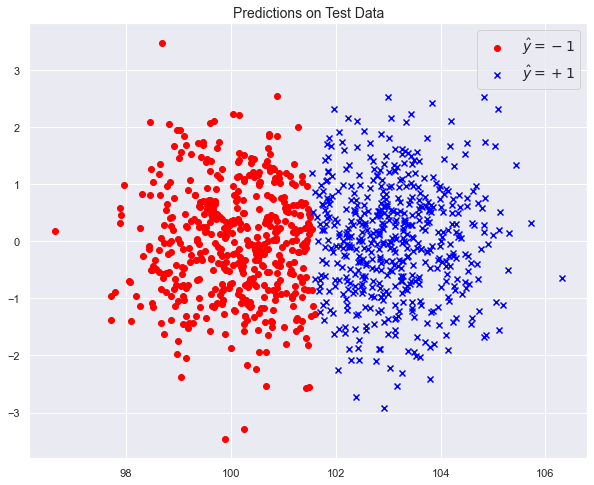

In [21]:
# Center the data:
mean_x_tr_d = x_tr_d.mean(axis=0)
x_tr_d_centered = x_tr_d - mean_x_tr_d
x_te_d_centered = x_te_d - mean_x_tr_d  # Use mean_x_tr_d!

# Gradient of the squared loss:
def grad_sq(x, y, a):
    return 2 * x.T @ (x @ a - y)

# Estimate a with the gradient decent:
eta = 0.00001
a_hat = np.zeros(x_tr_d_centered.shape[1])

grad_a = grad_sq(x_tr_d_centered, y_tr, a_hat)
while np.linalg.norm(grad_a) > 1e-5:  # Stopping condition with the gradient.
# or simply do `for i in range(10000):`

    grad_a = grad_sq(x_tr_d_centered, y_tr, a_hat)
    a_hat = a_hat - eta * grad_a
    # loss = ((x_tr_d_centered @ a_hat - y_tr)**2).mean(axis=0)
    # print(loss, np.linalg.norm(grad_a))

# Predict y_te:
y_te_hat = np.sign(x_te_d_centered @ a_hat)

# Plot the result:
plt.figure(figsize=(10, 8))
plt.scatter(x_te[y_te_hat == -1, 0], x_te[y_te_hat == -1, 1], marker='o', c='red', label='$\hat{y} = -1$')
plt.scatter(x_te[y_te_hat == 1, 0], x_te[y_te_hat == 1, 1], marker='x', c='blue', label='$\hat{y} = +1$')
plt.title('Predictions on Test Data', fontsize=14)
plt.legend(fontsize=14)